In [2]:
# Load dataset
import pandas as pd

df = pd.read_csv('./Content/IMDB-Dataset.csv')

# Remove duplicate rows
df = df.drop_duplicates()

In [4]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.3 MB/s  0:00:00

   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   ---------------------------------------- 2/2 [nltk]



In [6]:
!pip install bs4


   ------------- -------------------------- 1/3 [beautifulsoup4]
   ---------------------------------------- 3/3 [bs4]



In [8]:
!pip install contractions


   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------- ----------------------------- 1/4 [anyascii]
   ---------------------------------------- 4/4 [contractions]



In [9]:
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F1E0-\U0001F1FF" # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
        "]+", flags = re.UNICODE)
    
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text ) #add space after full stop
    text = re.sub(r'http\S+', '', text) # remove urls
    text = "".join([
                    word.lower() for word in text if word not in string.punctuation
            ]) # remove punctuation and make text lowercase
    text = " ".join([
                    wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) # lemmatize
    return text

df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


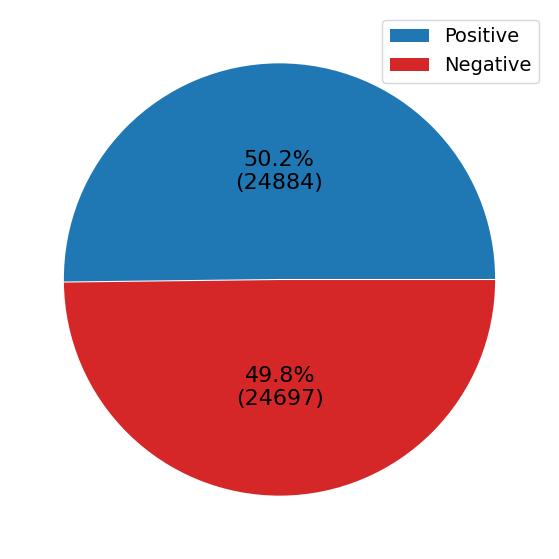

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']

# Create pie chart
pie, ax = plt.subplots(figsize = [11, 7])
plt.pie(x=data, autopct = lambda pct: func(pct, data), explode = [0.0025] * 2,
            pctdistance = 0.5, colors = [sns.color_palette()[0], 'tab:red'], textprops ={'fontsize': 16})

# plt.title(’Frequencies of sentiment labels ’, fontsize =14, fontweight = ’bold’)
labels = [r'Positive', r'Negative']
plt.legend(labels, loc = "best", prop ={'size': 14})
pie.savefig("PieChart.png")
plt.show()

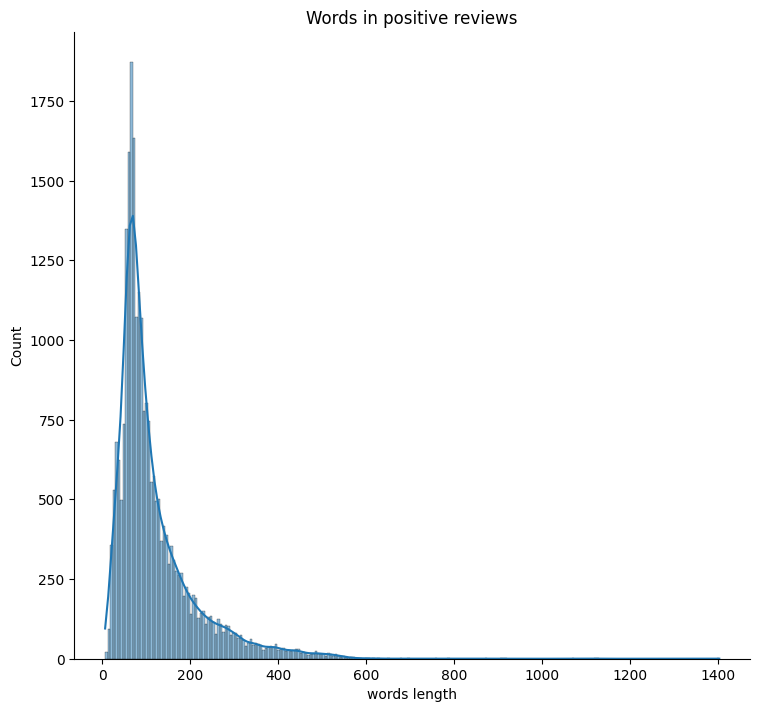

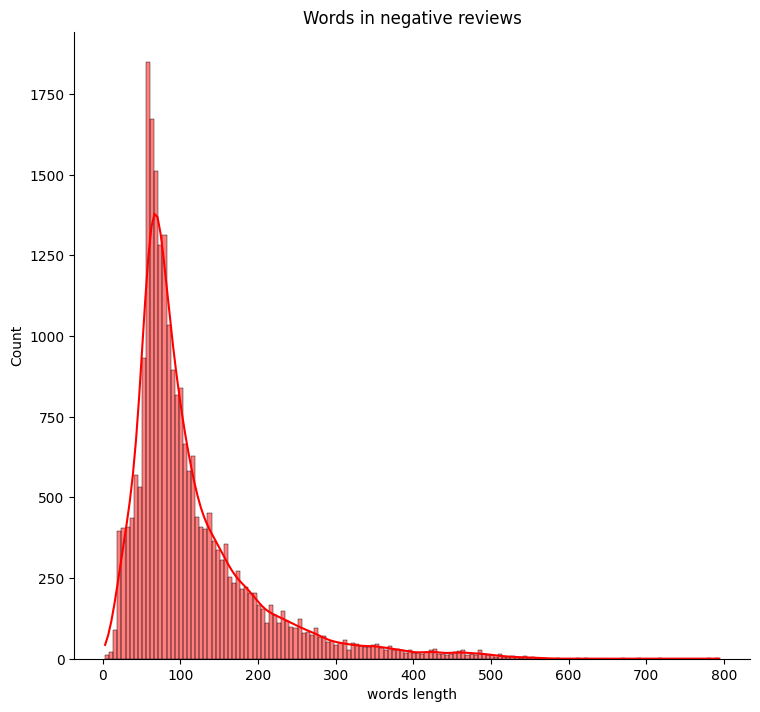

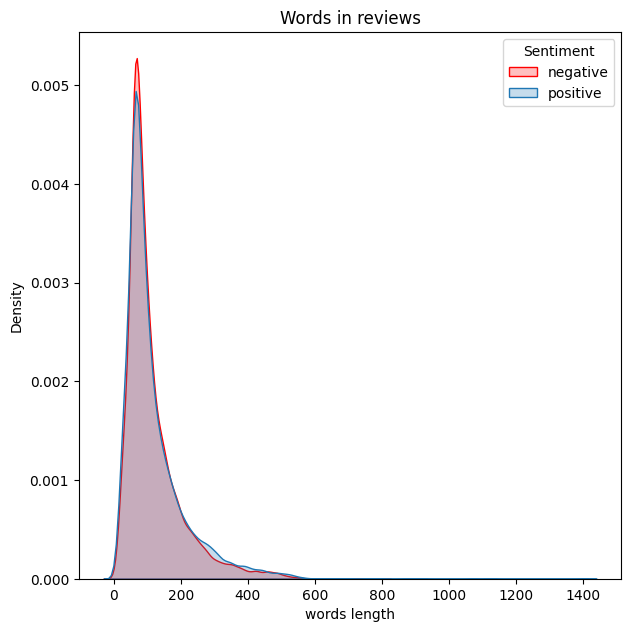

In [13]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
                    data = df_temp[df_temp['sentiment'] == 'positive'],
                    x="words length", hue= "sentiment", kde=True, height =7, aspect = 1.1, 
                    legend = False).set(title = 'Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
                    data = df_temp[df_temp['sentiment'] == 'negative'],
                    x= "words length", hue= "sentiment", kde = True, height = 7, aspect = 1.1, 
                    legend = False, palette = ['red']).set(title = 'Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize = (7 ,7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
                    data = df_temp, x= "words length", hue= "sentiment", fill = True, palette = 
                    [sns.color_palette()[0], 'red']).set(title = 'Words in reviews')
plt.legend(title = 'Sentiment', labels =['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test , y_train , y_test = train_test_split(
                x_data , y_data , test_size =0.2 , random_state =42
)

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features =10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [22]:
x_train_encoded.shape, x_test_encoded.shape

((39665, 10000), (9917, 10000))

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
                criterion = 'entropy',
                random_state = 42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7150347887465968

In [24]:
rf_classifier = RandomForestClassifier(
                random_state = 42
)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8429968740546536